___
<center>
    
# MEC 424 - Artifical Intelligence Application
# Assignment 2 - Logistic Regression Project
___

    
In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need**
___

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [3]:
from google.colab import drive
drive.mount('/content/drive')
# I was working with Colab thus this step is required

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
ad_data = pd.read_csv('/content/drive/MyDrive/AI_APP_FUE/Session_2/advertising.csv')

**Check the head of ad_data**

In [6]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [7]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [8]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

<Axes: xlabel='Age', ylabel='Count'>

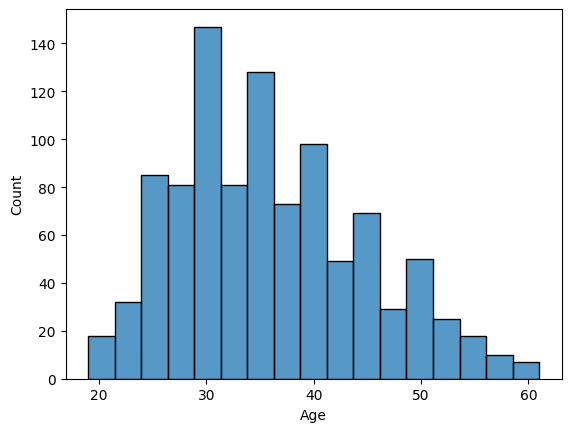

In [9]:
sns.histplot(ad_data['Age'])

**Create a jointplot showing Area Income versus Age.**

<Figure size 640x480 with 0 Axes>

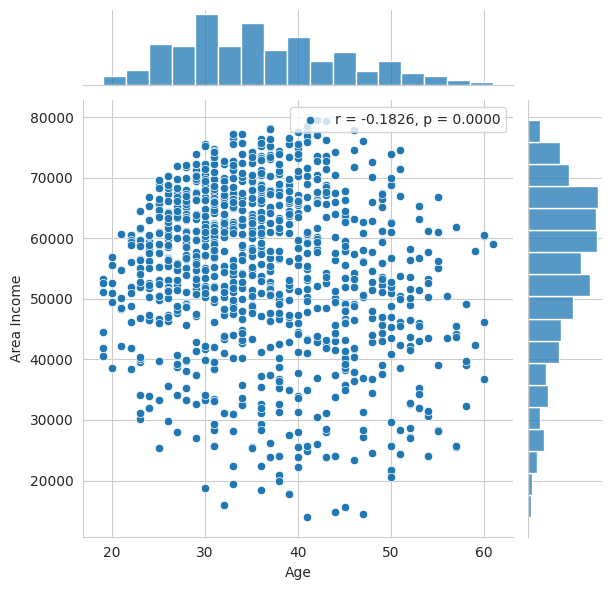

In [43]:
from scipy.stats import pearsonr
plt.figure()
plt.figsize=(10,10)

sns.jointplot(x='Age', y='Area Income', data=ad_data)
r, p = pearsonr(ad_data["Age"], ad_data["Area Income"])

plt.legend([f"r = {r:.4f}, p = {p:.4f}"], loc="upper right")
plt.show()

plt.show()


**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

<Figure size 640x480 with 0 Axes>

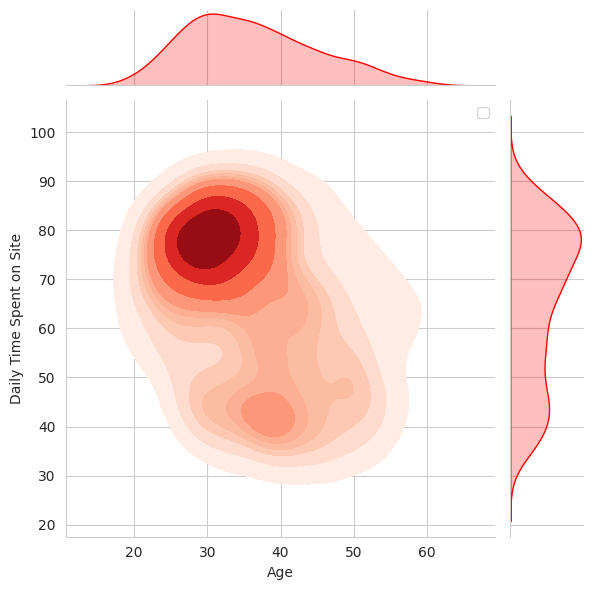

In [47]:

plt.figure()
plt.figsize=(10,10)

sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data,kind='kde', fill=True, cmap='Reds',marginal_kws={"color": "red"})
r, p = pearsonr(ad_data["Age"], ad_data["Daily Time Spent on Site"])

plt.legend([f"r = {r:.4f}, p = {p:.4f}"], loc="upper right")
plt.show()

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

<Figure size 640x480 with 0 Axes>

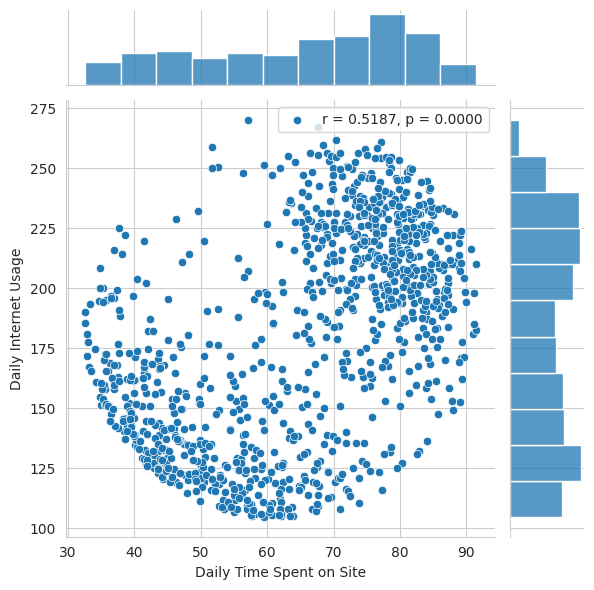

In [48]:
plt.figure()
plt.figsize=(10,10)

sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data)
r, p = pearsonr(ad_data["Daily Time Spent on Site"], ad_data["Daily Internet Usage"])

plt.legend([f"r = {r:.4f}, p = {p:.4f}"], loc="upper right")
plt.show()

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

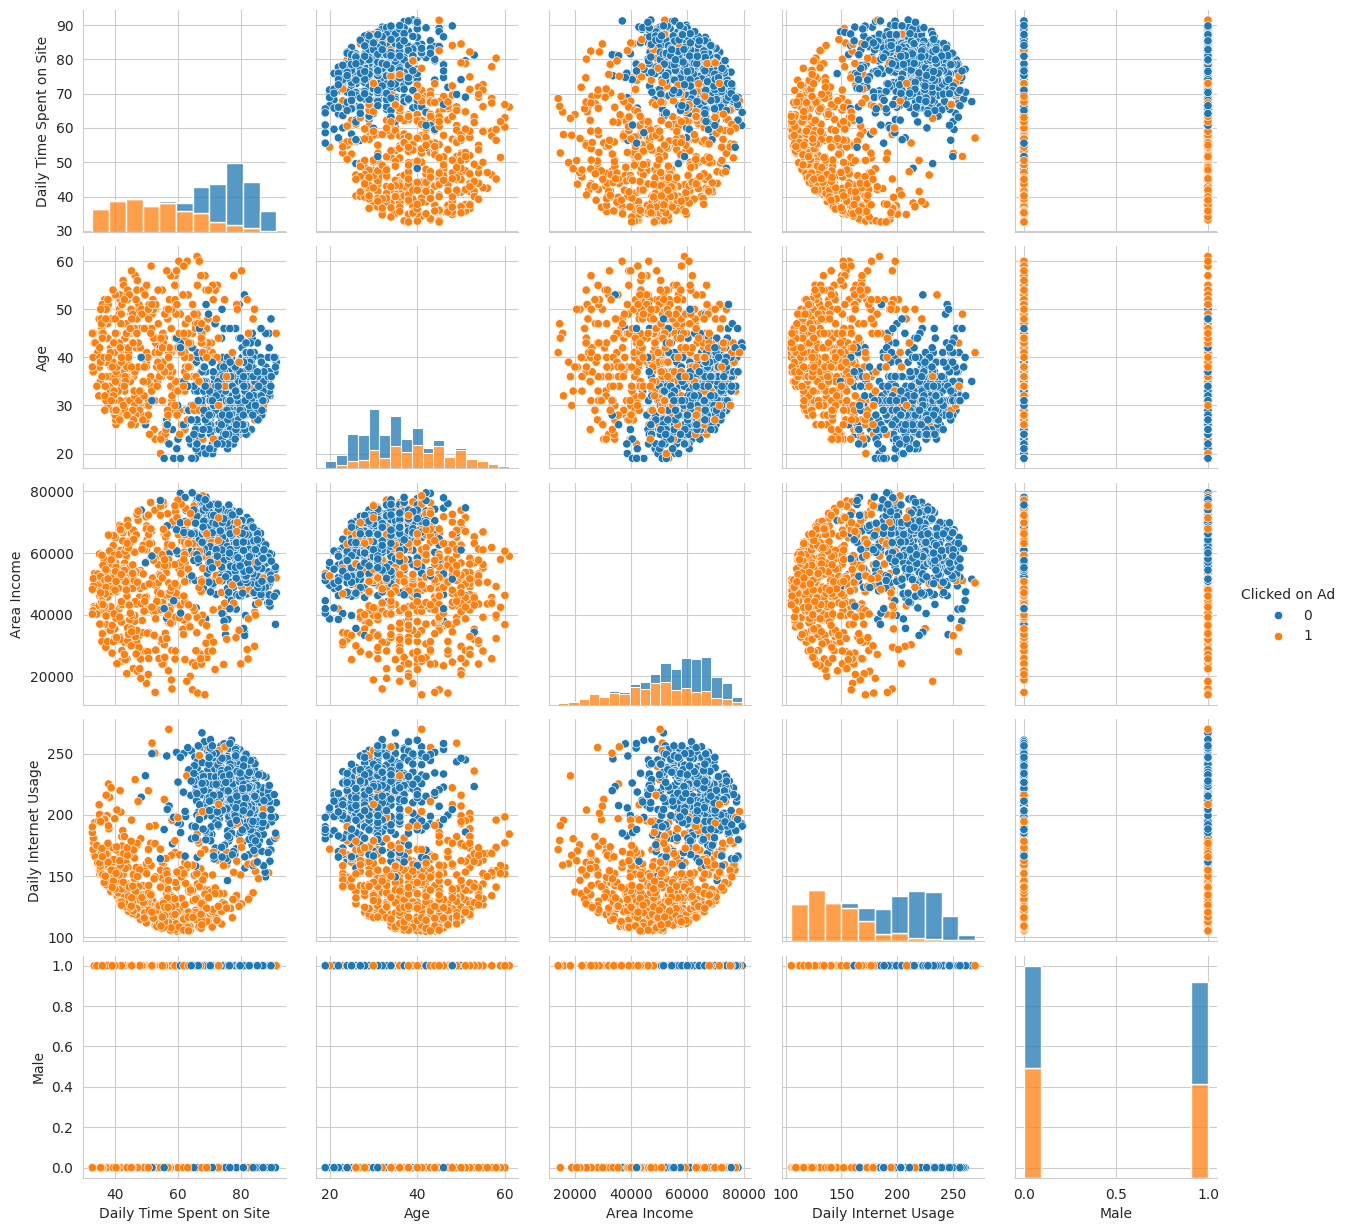

In [49]:
data = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male',
     'Clicked on Ad']]
sns.pairplot(data, hue="Clicked on Ad", diag_kind="hist",diag_kws={"multiple":"stack"})


# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [64]:
x = ad_data.drop(['Timestamp', 'Clicked on Ad','City','Country',"Ad Topic Line"], axis=1)
y = ad_data['Clicked on Ad']

In [65]:
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [66]:
y

,Clicked on Ad
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,0


** Train and fit a logistic regression model on the training set.**

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:

lr= LogisticRegression(
    C=1.0,
    class_weight=None,
    dual=False,
    fit_intercept=True,
    intercept_scaling=1,
    max_iter=100,
    multi_class='ovr',
    n_jobs=1,
    penalty='l2',
    random_state=None,
    solver='liblinear',
    tol=0.0001,
    verbose=0,
    warm_start=False
)


print(lr)


LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')


In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101,stratify= y)

In [71]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

## Predictions and Evaluations
** Now predict values for the testing data.**

In [72]:
y_pred = lr.predict(x_test)

** Create a confusion matrix for the model.**

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
print(confusion_matrix(y_test, y_pred))

[[136  14]
 [ 18 132]]
